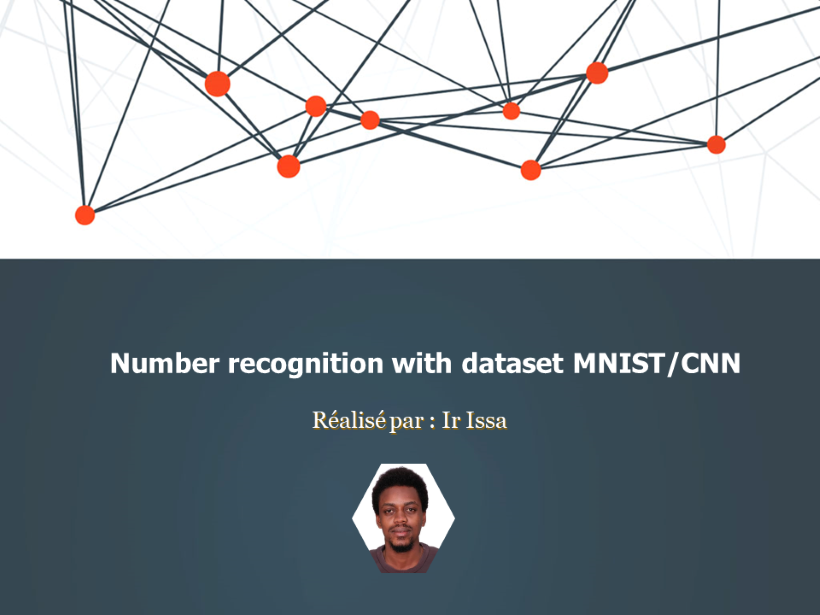

# **Introduction**

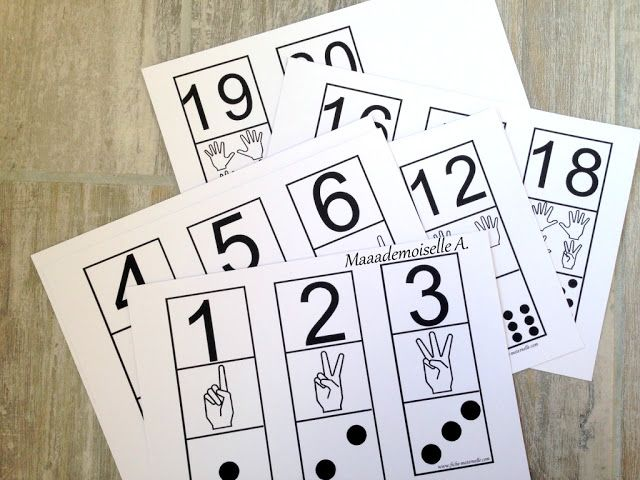

***La reconnaissance de chiffres manuscrits est un problème classique de vision par ordinateur, qui sert souvent de référence pour tester et valider de nouveaux modèles d’apprentissage automatique. Le dataset MNIST (Modified National Institute of Standards and Technology) contient des images de chiffres manuscrits allant de 0 à 9, représentant un défi intéressant pour les modèles de classification. L'objectif de ce travail est de mettre en œuvre un modèle de réseau de neurones convolutifs (CNN) en utilisant le framework TensorFlow pour classer ces chiffres. Ce projet, en plus d'être un exercice d'application de techniques avancées d’apprentissage profond, sert de base pour explorer des approches plus complexes et comprendre leur fonctionnement, ce qui est essentiel pour l'avancement dans le domaine des systèmes intelligents.***

# **Contexte**

***L'apprentissage profond, et en particulier les réseaux de neurones convolutifs, a révolutionné la vision par ordinateur en offrant des performances exceptionnelles pour la classification d'images, la détection d'objets et bien d'autres tâches. MNIST est un jeu de données qui a été largement utilisé pour évaluer les algorithmes d'apprentissage profond, car il contient un ensemble de 70 000 images étiquetées de chiffres manuscrits. Il offre une base solide pour tester des modèles CNN avant de les appliquer à des tâches plus complexes. Ce projet vise à exploiter ces techniques pour effectuer une classification précise des chiffres.***

# **Motivation**

***La progression constante dans les secteurs de l'intelligence artificielle et de l'apprentissage machine est indispensable pour avancer dans des applications pratiques. Ce projet offre l'opportunité d'enrichir la connaissance des réseaux convolutifs tout en manipulant un ensemble de données soigneusement analysé. Ce travail scientifique, mené selon une approche méthodique rigoureuse, représente une phase cruciale pour développer une expertise dans la création et l'amélioration de modèles d'apprentissage profond, ainsi que pour valider leur performance à l'aide d'indicateurs standards tels que la matrice de confusion.***

# **Pour réaliser notre travail nous allons éffectuer ces étapes ci-dessous :**

 - **Importation des bibliothèques nécessaires**.
 - **Chargement et prétraitement des données.**
 - **Construire un modèle CNN.**
 - **Compilation et entraînement du modèle.**
 - **Évaluation et matrice de confusion.**
 - **Faire des prédictions sur de nouvelles images.**

# **1. Importer les bibliothèques**

***La première étape de notre travail consistait à importer les bibliothèques requises pour le projet : TensorFlow pour la création et l'entraînement du modèle de réseau de neurones, Matplotlib pour la visualisation des données et des résultats, ainsi que NumPy pour la manipulation des matrices et des vecteurs.***

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


# **2. Charger et préparer les données MNIST**

***Après avoir importé les bibliothèques, nous allons charger le dataset pour*** :

***Nous avons normalisé les images pour que les valeurs des pixels soient dans la plage [0, 1] en les divisant par 255, ce qui améliore la convergence du modèle. De plus, nous avons redimensionné les images pour les adapter à la structure attendue par le CNN, en ajoutant une dimension supplémentaire pour le canal de couleur (28, 28, 1).***

In [ ]:
# Charger les données MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normaliser les données
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshaper les données (ajouter une dimension pour le canal de couleur)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Vérification des tailles des données
print("Taille des données d'entraînement :", x_train.shape)
print("Taille des données de test :", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Taille des données d'entraînement : (60000, 28, 28, 1)
Taille des données de test : (10000, 28, 28, 1)


# **3. Construction de notre CNN**

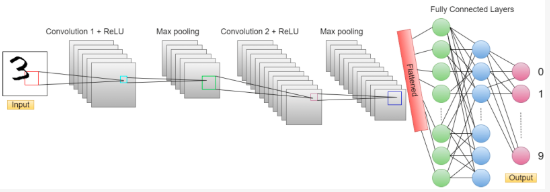

***Ce modèle se compose de FrontEnd d'extraction et d'un Classifier dont deux couches convolutives suivies de couches de sous-échantillonnage (max-pooling), permettant d'extraire les caractéristiques les plus importantes des images. Enfin, les données extraites sont passées à une couche entièrement connectée pour effectuer la classification en 10 classes (une pour chaque chiffre). Le modèle utilise la fonction d'activation ReLU pour les couches internes et softmax pour la couche de sortie.***

In [ ]:
model = models.Sequential([
    # Première couche convolutive
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Deuxième couche convolutive
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Couche Flatten
    layers.Flatten(),

    # Couche dense
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes pour les chiffres 0-9
])

# Afficher le résumé du modèle
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

# **4. Compiler et entraîner le modèle**

***Une fois le modèle créé, nous l’avons compilé avec un optimiseur Adam et une fonction coût sparse_categorical_crossentropy, adaptée à notre tâche de classification multi-classes. Nous avons ensuite entraîné le modèle sur les données d'entraînement pendant 10 Epochs, ce qui a permis de lui apprendre à reconnaître les chiffres.***

In [ ]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9955 - loss: 0.0145 - val_accuracy: 0.9917 - val_loss: 0.0298
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9967 - loss: 0.0099 - val_accuracy: 0.9911 - val_loss: 0.0311
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9909 - val_loss: 0.0320
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9981 - loss: 0.0061 - val_accuracy: 0.9898 - val_loss: 0.0443
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9979 - loss: 0.0073 - val_accuracy: 0.9862 - val_loss: 0.0596
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9978 - loss: 0.0065 - val_accuracy: 0.9904 - val_loss: 0.0445
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9980 - loss: 0.0050 - val_accuracy: 0.9908 - val_loss: 0.0411
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9986 -

# **5. Évaluer les performances de notre modèle**

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9888 - loss: 0.0505
Précision sur les données de test : 0.9910
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


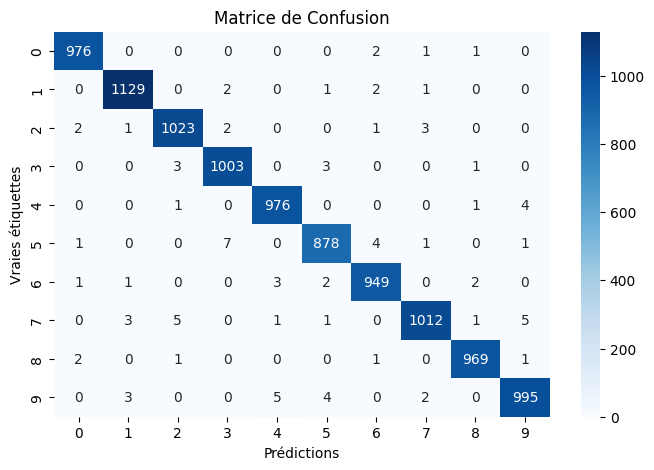

In [ ]:
# Évaluation du modèle
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Précision sur les données de test : {test_acc:.4f}")

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

# **6. Faire des prédictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


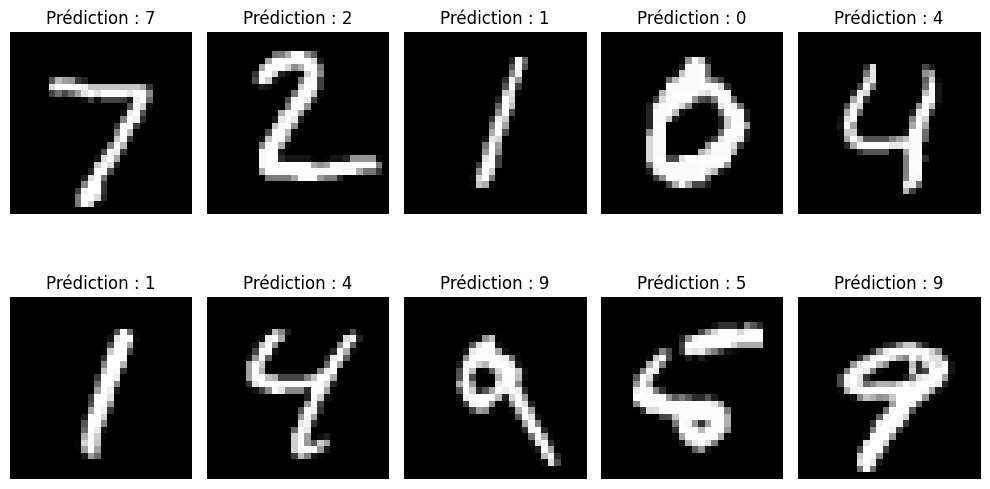

In [ ]:
# Faire des prédictions sur 10 exemples
n_examples = 10
predictions = model.predict(x_test[:n_examples])

# Affichage des images et de leurs prédictions
plt.figure(figsize=(10, 6))

for i in range(n_examples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prédiction : {np.argmax(predictions[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Conclusion**

***Ce projet, en appliquant un modèle CNN au dataset MNIST, constitue une étape fondamentale pour renforcer la compréhension des architectures de réseaux de neurones convolutifs, un domaine central en vision par ordinateur. En suivant cette méthodologie, nous avons exploré les différentes étapes nécessaires pour traiter les données, construire un modèle, l'entraîner et évaluer ses performances. Ces compétences seront précieuses pour aborder des problèmes de plus grande envergure dans le domaine de l’intelligence artificielle, et s'inscrivent dans un processus d'amélioration continue dans le cadre de la recherche scientifique.***